<a href="https://colab.research.google.com/github/CarlosSMWolff/Quantum-Optics-Course/blob/main/1_Quantum_single_mode_field.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install necessary libraries

In Colab, we will need to install qutip into the machine.

In [ ]:
! pip install qutip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 63.9 MB/s eta 0:00:00


Load libraries

In [ ]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import cm


# Single-mode field: definitions of operators and basis states (Fock states)

When describing numerically the states of a harmonic oscillator, we must always make a first approximation: truncating the Hilbert space. Unfortunately, we cannot yet fit the infinite Hilbert space of the harmonic oscillator in our RAM memory, so we must choose a number of levels to be included in our description, which we define here as ```Ntrun```. 



In [ ]:
Ntrun = 20

Now we can defined our annihilation operator in our truncated Hilbert space, using the Qutip command ```destroy```


In [ ]:
a = destroy(Ntrun)

The basis in which operators are built is the basis of Fock states, i.e. the eigenstates of the free harmonic oscillator. We can use the command ```basis``` to create such states. Let's see an example creating


1.   The vacuum state, $|0\rangle$
2.   A state with exactly 3 photons, $|3\rangle$


In [ ]:
vac = basis(Ntrun,0)
fock3 = basis(Ntrun,3)

Let us know compute some expectation values to check that we get the correct mean photon numbers, given by the expectation value of the operator $a^\dagger a$, which we define as ```a.dag()*a```. 

Notice that, in Qutip:

1.  Products of operators are done with the ```*``` operator.
2.  Conjugate transpose of an operator is obtained using the function ```.dag()```.



In [ ]:
expect(a.dag()*a, vac)

0.0

In [ ]:
expect(a.dag()*a, fock3)

2.9999999999999996

# Visualizations in phase space

We compute the Wigner function to visualize states in phase space

In [ ]:
xvec = np.linspace(-5, 5, 500)
W_vacuum = wigner(vac, xvec, xvec, g=2)

Let us define a function to plot Wigner functions from now on

In [ ]:
def plot_wigner(wigner,xvec,yvec=None):
  if yvec== None:
    yvec = xvec
  wmap = wigner_cmap(W)  # Generate Wigner colormap
  nrm = mpl.colors.Normalize(-wigner.max(), wigner.max())

  fig, ax = plt.subplots(figsize=(5,5))
  ax.contourf(xvec, yvec, wigner, 100, cmap=cm.RdBu, norm=nrm)
  ax.set_xlabel("x")
  ax.set_xlabel("y")
  plt.show()


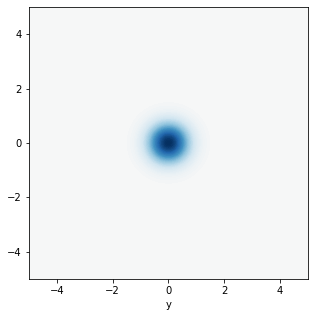

In [ ]:
plot_wigner(W_vacuum,xvec)

# Coherent states

We can create a coherent state simply with the function ```coherent```

In [ ]:
alpha = 2

psi_alpha = coherent(Ntrun, alpha)

Let's visualize this state in phase space.

WARNING: We need to call ```wigner()``` with parameter ```g=2``` to be consistent with our definition of quadratures, which is 

$$ x \equiv \frac{1}{2}(a + a^\dagger) $$

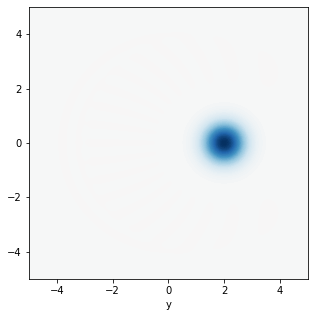

In [ ]:
W_coherent= wigner(psi_alpha, xvec, xvec, g= 2)
plot_wigner(W_coherent,xvec)

We can also create these states by using the displacement operator